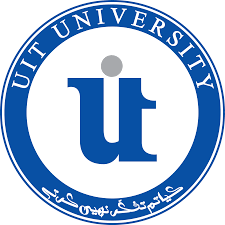

# <center>ROLL NO: 20B-060-SE, NAME: ADEENA HUSSAIN

# <h1 style="color:#392196;text-align:center; text-shadow: 5px 5px 8px #757575; font-size: 42px">DATA ANALYS "STUDENT PERFORMANCE"</h1> 

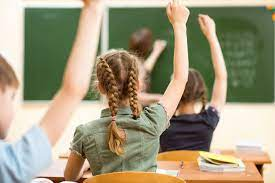

# <h1 style="color:#20ba94;text-align:center; text-shadow: 5px 5px 8px #757575; font-size: 42px">Instructor SIR ZAIN MIRZA</h1>

# import

In [2]:
!pip install flaml

  Using cached FLAML-1.0.7-py3-none-any.whl (196 kB)
  Using cached xgboost-1.3.3-py3-none-win_amd64.whl (95.2 MB)
  Using cached scikit_learn-1.1.1-cp38-cp38-win_amd64.whl (7.3 MB)
  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

# wrangling

In [4]:
data = pd.read_csv("student_data.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
data.shape

(395, 33)

In [6]:
data.describe

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel f

In [7]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
data.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [9]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [80]:
data['exam'] = (data['G1']+data['G2']+data['G3'])/3

In [81]:
data['verdict'] =0

In [82]:
for i in  data['exam'].index:
    if data['exam'][i] >=10:
        data['verdict'][i] =1;
    else:
        data['verdict'][i] = 0;

In [83]:
data.verdict.unique()

array([0, 1], dtype=int64)

# data analys

In [56]:
sns.set_context("talk")
sns.set_style("whitegrid")
colors = sns.color_palette("pastel")[0:5]

In [57]:
data.school.nunique()

2

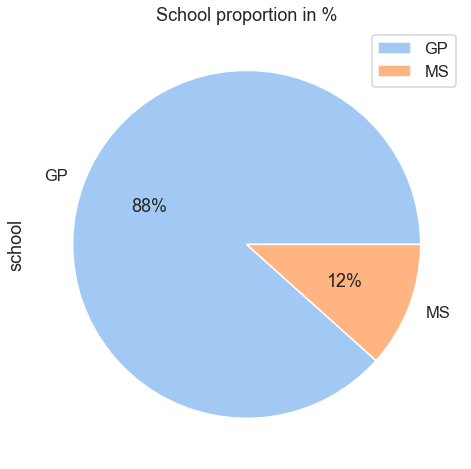

In [58]:
plt.figure(figsize=(10,8))
data.school.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors,)
plt.title('School proportion in %')
plt.legend()

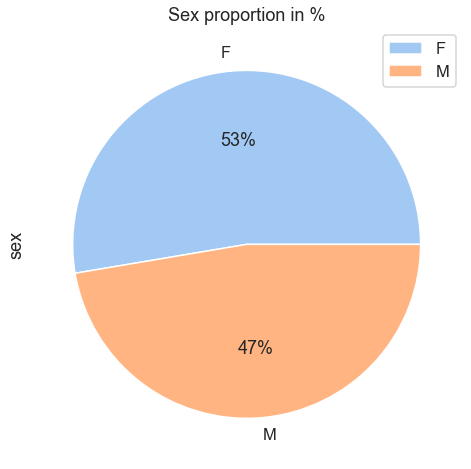

In [59]:
plt.figure(figsize=(10,8))
data.sex.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Sex proportion in %')
plt.legend()

Text(0.5, 1.0, 'Age Distribution')

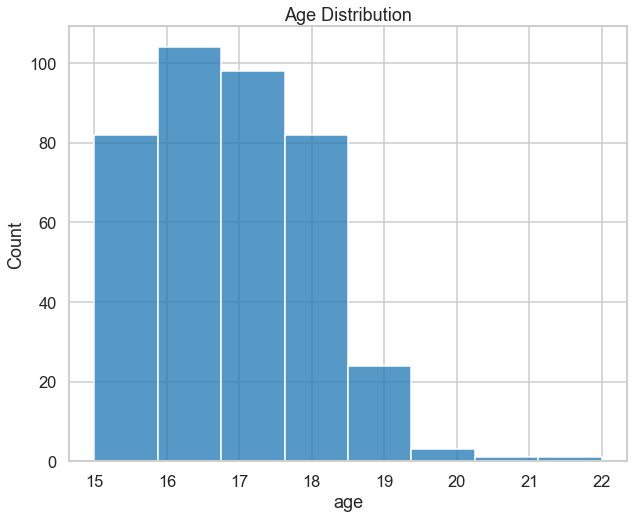

In [60]:
plt.figure(figsize=(10,8))
sns.histplot(data = data, x='age', bins=8, palette = colors)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Health')

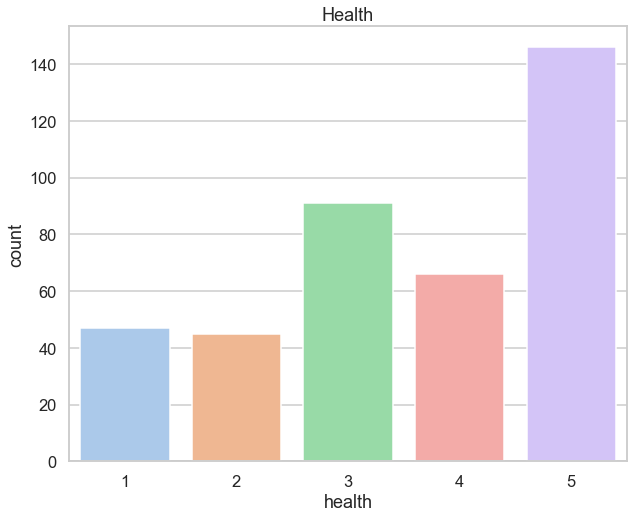

In [61]:
plt.figure(figsize=(10,8))
sns.countplot(data = data, x='health', palette = colors)
plt.title('Health')

Text(0.5, 1.0, 'Absences Distributiion')

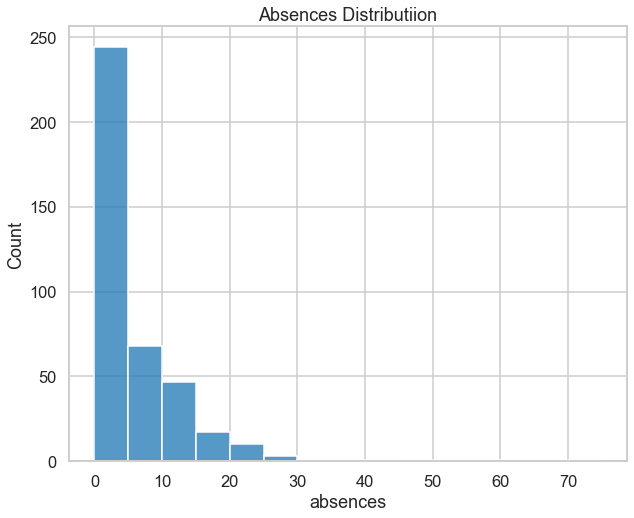

In [62]:
plt.figure(figsize=(10,8))
sns.histplot(data = data, x='absences', bins=15, palette = colors)
plt.title('Absences Distributiion')

Text(0.5, 1.0, 'Grade 3 Distribution')

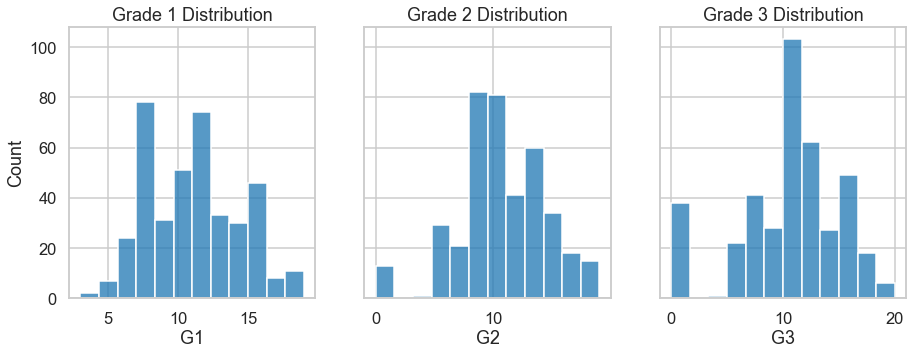

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(15,5),sharey=True)

# G1
sns.histplot(ax=axes[0], data = data, x='G1', palette = colors, bins = 12)
axes[0].set_title('Grade 1 Distribution')

# G2
sns.histplot(ax=axes[1], data = data, x='G2', palette = colors, bins = 12)
axes[1].set_title('Grade 2 Distribution')

# G3
sns.histplot(ax=axes[2], data = data, x='G3', palette = colors, bins = 12)
axes[2].set_title('Grade 3 Distribution')

In [86]:
data_Msex = data.query('sex=="M"').sample(187)

In [87]:
data_Fsex = data.query('sex=="F"').sample(187)

In [88]:
data_sex = data_Msex.append(data_Fsex)

Text(0.5, 1.0, 'Women students success %')

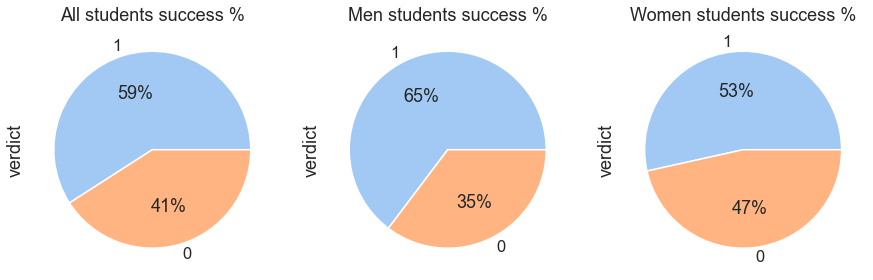

In [89]:
fig, axes = plt.subplots(1,3, figsize=(15,8))

#sex
data_sex.verdict.value_counts().plot(ax=axes[0],kind='pie',colors=colors, autopct='%.0f%%')
axes[0].set_title('All students success %')

#Msex
data_Msex.verdict.value_counts().plot(ax=axes[1], kind='pie',colors=colors, autopct='%.0f%%')
axes[1].set_title('Men students success %')

#Fex
data_Fsex.verdict.value_counts().plot(ax=axes[2], kind='pie',colors=colors, autopct='%.0f%%')
axes[2].set_title('Women students success %')

Text(0.5, 1.0, 'Student success considering father education level')

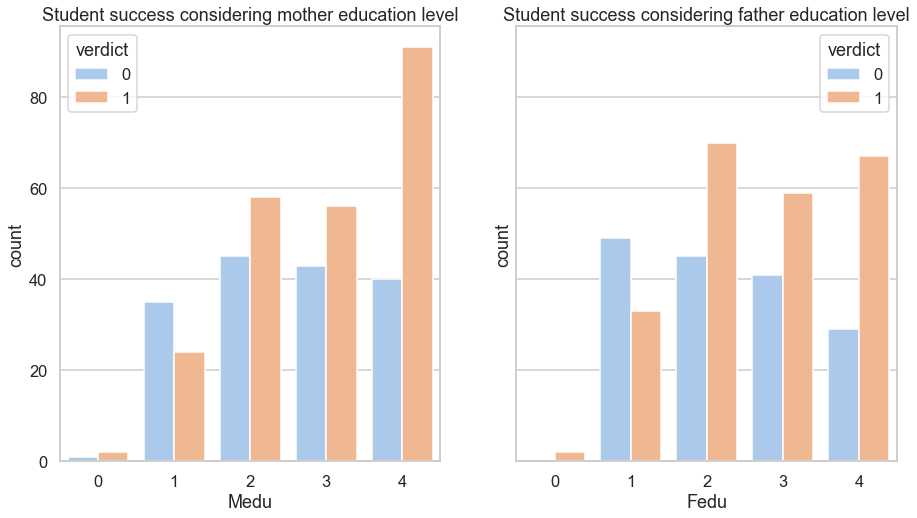

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8),sharey=True)

# Medu
sns.countplot(ax=axes[0], data = data, x='Medu', hue='verdict', palette = colors)
axes[0].set_title('Student success considering mother education level')

# Fedu
sns.countplot(ax=axes[1], data = data, x='Fedu', hue='verdict', palette = colors)
axes[1].set_title('Student success considering father education level')

In [91]:
data_travel_exam1 = pd.DataFrame([data.query('traveltime==1').exam.mean(),data.query('traveltime==2').exam.mean(),
                            data.query('traveltime==3').exam.mean(),data.query('traveltime==4').exam.mean(),
                            ],columns=['mscore'],index=[1,2,3,4])


data_travel_exam2 = pd.DataFrame([data.query('traveltime==1').exam.median(),data.query('traveltime==2').exam.median(),
                            data.query('traveltime==3').exam.median(),data.query('traveltime==4').exam.median(),
                            ],columns=['mscore'],index=[1,2,3,4])

Text(0.5, 0, 'Traveltime')

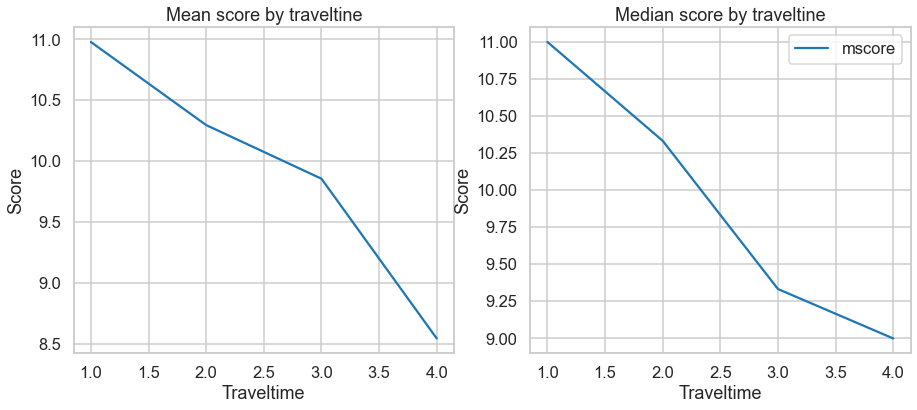

In [92]:
fig, axes =plt.subplots(1,2, figsize=([15,6]))

#mean
data_travel_exam1.mscore.plot(ax=axes[0])
axes[0].set_title('Mean score by traveltine')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Traveltime')

#median
data_travel_exam2.plot(ax=axes[1])
axes[1].set_title('Median score by traveltine')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Traveltime')